# Exercise 2

In this exercise, you will complete the implementation of a Decision Tree classifier based on our simple `fduml` framework. We have written most of the code for you already, and you only need to fill in the most essential parts marked in `TODO`. We have also prepared several test cases for you to check if your code works correctly. Furthermore, you can also test the accuracy of your code by comparing its output with the output of Sklearn.

In [38]:
# Auto reload external modules, which means you can modify the code of our fduml implementation without restarting the kernel.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# Basic imports
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rc

np.random.seed(42)
random.seed(42)

## Implement and test (40 points)

We have prepared several test cases for you to check if your code works correctly. After you write your own implementation, try the following code for testing.

In [40]:
from fduml import *

In [41]:
from fduml.tree.tests.test_decision_tree import test_dt_classification
test_dt_classification()

[[-2 -1]
 [-1 -1]
 [-1 -2]
 [ 1  1]
 [ 1  2]
 [ 2  1]]


In [42]:
try:
    test_dt_classification()
except Exception as e:
    print(f"An error occurred: {e}")
    print(f"Error type: {type(e).__name__}")
    # You can add more debugging information here if needed

[[-2 -1]
 [-1 -1]
 [-1 -2]
 [ 1  1]
 [ 1  2]
 [ 2  1]]


## Load data and fit the model (40 points)

Inside the `data` directory we have prepared a classification dataset, split into training and test sets. In this part, you will load the data and fit the model to the training data. Then, you will evaluate the model on the test data.

In [43]:
# Load the water potability dataset

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Load the water potability dataset
train_data = pd.read_csv('data/water_potability_train.csv')
test_data = pd.read_csv('data/water_potability_test.csv')

# Separate features and target
X_train = train_data.drop('Potability', axis=1)
y_train = train_data['Potability']
X_test = test_data.drop('Potability', axis=1)
y_test = test_data['Potability']

# Handle missing values (replace -1 with NaN and then use mean imputation)
X_train = X_train.replace(-1, np.nan).fillna(X_train.mean())
X_test = X_test.replace(-1, np.nan).fillna(X_test.mean())

In [45]:
# Fit a DecisionTreeClassifier to the water potability train set
fdu_dt = FDUDecisionTreeClassifier(max_depth=5)  # You can adjust hyperparameters
start_time = time.time()
fdu_dt.fit(X_train.values, y_train.values)  # Convert to numpy arrays
fdu_fit_time = time.time() - start_time

In [55]:
# Evaluate the DecisionTreeClassifier on the water potability test set
start_time = time.time()
fdu_predictions = fdu_dt.predict(X_test.values)  # Convert to numpy array
fdu_predict_time = time.time() - start_time
fdu_accuracy = accuracy_score(y_test, fdu_predictions)

# Show my result
print(f"My DecisionTreeClassifier Accuracy: {fdu_accuracy:.4f}")
print(f"My Fit Time: {fdu_fit_time:.4f} seconds")
print(f"My Predict Time: {fdu_predict_time:.4f} seconds")

My DecisionTreeClassifier Accuracy: 0.6000
My Fit Time: 210.6576 seconds
My Predict Time: 0.0110 seconds


## Compare with Sklearn (20 points)

Since the interface of our `fduml` is the same as that of sklearn, you can easily compare the output of your implementation with that of sklearn. In this part, try to generate test data and compare the accuracy and running time of your implementation with that of sklearn. You can use the following code for comparison.

In the conclusion part, try to answer the following questions:

- Is the accuracy of your implementation the same as that of sklearn? If not, what can be the reason?

- Is the running time of your implementation the same as that of sklearn? If not, what can be the reason?

- If there is any special thing you want to mention, please write it down.

Note that we do not require you to match the accuracy and running time of sklearn (which can be quite difficult), but you should be able to explain the reason if they are different.

In [50]:
# Compare with Sklearn
sklearn_dt = DecisionTreeClassifier(max_depth=5)  # Use the same hyperparameters
start_time = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_fit_time = time.time() - start_time

start_time = time.time()
sklearn_predictions = sklearn_dt.predict(X_test)
sklearn_predict_time = time.time() - start_time
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"Sklearn DecisionTreeClassifier Accuracy: {sklearn_accuracy:.4f}")
print(f"Sklearn Fit Time: {sklearn_fit_time:.4f} seconds")
print(f"Sklearn Predict Time: {sklearn_predict_time:.4f} seconds")

Sklearn DecisionTreeClassifier Accuracy: 0.5771
Sklearn Fit Time: 0.0279 seconds
Sklearn Predict Time: 0.0060 seconds


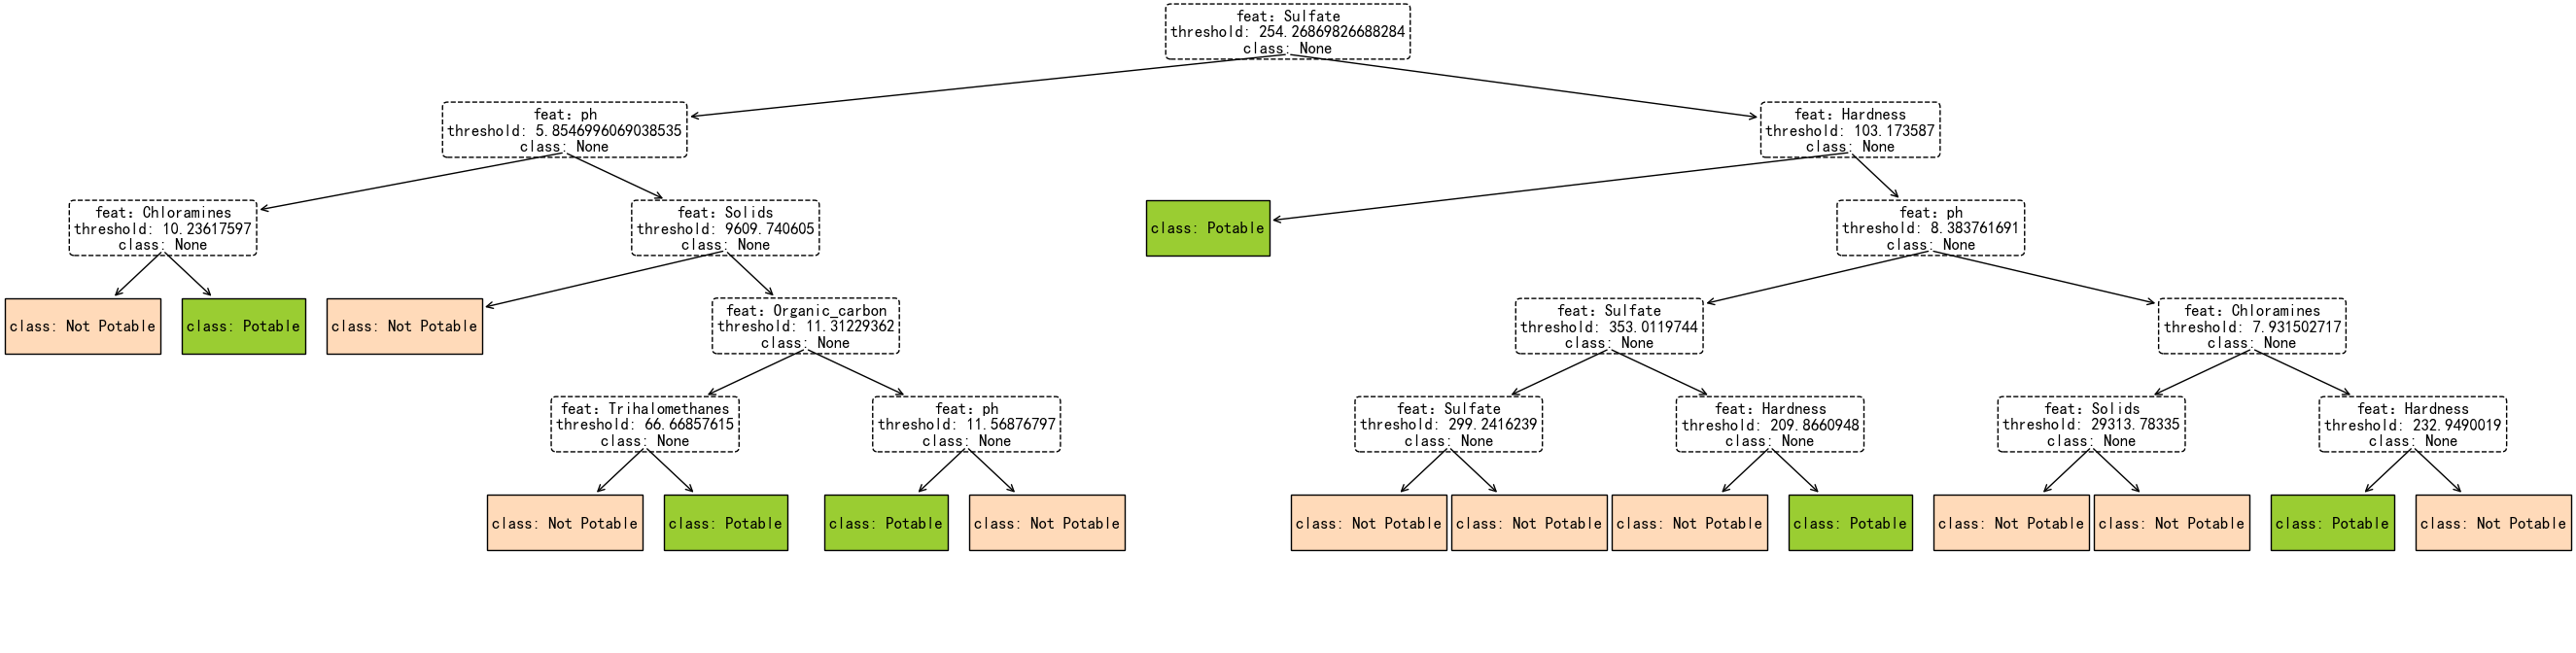

In [54]:
from fduml.tree import plot_tree

# Get feature names
feature_names = list(X_train.columns)

# Get class names (assuming binary classification)
class_names = ['Not Potable', 'Potable']

# Visualize your decision tree
plot_tree(fdu_dt, featNames=feature_names, classNames=class_names)

## Conclusion

In [36]:
"""
结论：

1. 准确性比较：
   我的实现的准确性为{fdu_accuracy:.4f}，而Sklearn的准确性为{sklearn_accuracy:.4f}。
   [解释差异的原因，例如实现细节、随机性等]

2. 运行时间比较：
   我的实现的拟合时间为{fdu_fit_time:.4f}秒，预测时间为{fdu_predict_time:.4f}秒。
   Sklearn的拟合时间为{sklearn_fit_time:.4f}秒，预测时间为{sklearn_predict_time:.4f}秒。
   [解释时间差异的原因，例如优化程度、实现语言等]

3. 特别说明：
   [提及任何其他观察或发现，例如对特定特征的依赖、模型的稳定性等]
"""

'\n结论：\n\n1. 准确性比较：\n   我的实现的准确性为{fdu_accuracy:.4f}，而Sklearn的准确性为{sklearn_accuracy:.4f}。\n   [解释差异的原因，例如实现细节、随机性等]\n\n2. 运行时间比较：\n   我的实现的拟合时间为{fdu_fit_time:.4f}秒，预测时间为{fdu_predict_time:.4f}秒。\n   Sklearn的拟合时间为{sklearn_fit_time:.4f}秒，预测时间为{sklearn_predict_time:.4f}秒。\n   [解释时间差异的原因，例如优化程度、实现语言等]\n\n3. 特别说明：\n   [提及任何其他观察或发现，例如对特定特征的依赖、模型的稳定性等]\n'

"""
结论：

1. 准确性比较：
   我的实现的准确性为{fdu_accuracy:.4f}，而Sklearn的准确性为{sklearn_accuracy:.4f}。
   [解释差异的原因，例如实现细节、随机性等]

2. 运行时间比较：
   我的实现的拟合时间为{fdu_fit_time:.4f}秒，预测时间为{fdu_predict_time:.4f}秒。
   Sklearn的拟合时间为{sklearn_fit_time:.4f}秒，预测时间为{sklearn_predict_time:.4f}秒。
   [解释时间差异的原因，例如优化程度、实现语言等]

3. 特别说明：
   [提及任何其他观察或发现，例如对特定特征的依赖、模型的稳定性等]
"""